## Fetching Data

In [1]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):    
    if not os.path.isdir(housing_path):        
        os.makedirs(housing_path)    
        
    tgz_path = os.path.join(housing_path, "housing.tgz")    
    urllib.request.urlretrieve(housing_url, tgz_path)  
    
    housing_tgz = tarfile.open(tgz_path)    
    housing_tgz.extractall(path=housing_path)    
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):    
    csv_path = os.path.join(housing_path, "housing.csv")    
    return pd.read_csv(csv_path)

df = load_housing_data()

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


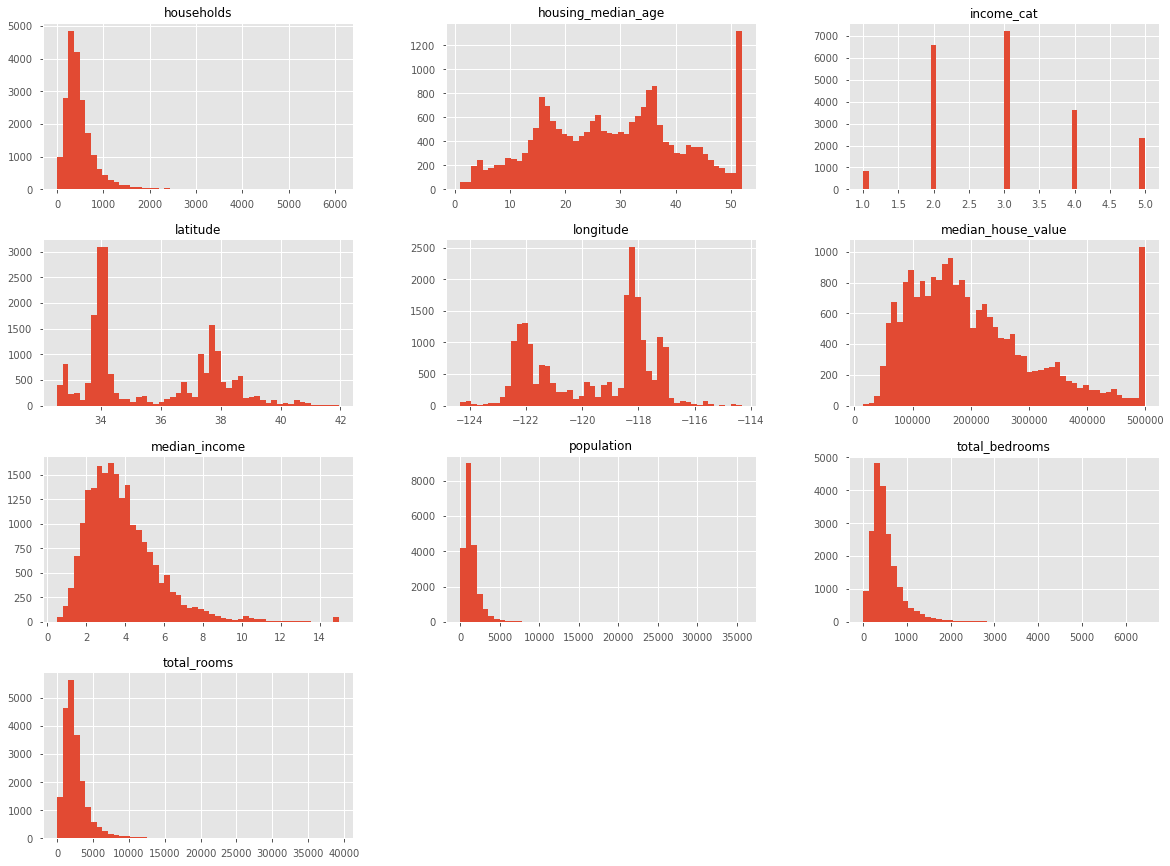

In [59]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

df.hist(bins=50, figsize=(20,15))
plt.show()

## Creating a Test Set

In [60]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(1774)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [61]:
train_set, test_set = split_train_test(df, 0.2)

In [62]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [63]:
df_id = df.reset_index()
df_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3.0
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3.0
7,7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3.0
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2.0
9,9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,3.0


## Using Scikitlearn's train_test_split

In [64]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=2412)

In [65]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
18139,-122.01,37.34,31.0,3080.0,526.0,1493.0,582.0,6.3052,344200.0,<1H OCEAN,5.0
202,-122.23,37.78,43.0,1420.0,472.0,1506.0,438.0,1.9338,112500.0,NEAR BAY,2.0
9150,-118.52,34.44,26.0,934.0,148.0,519.0,162.0,5.3209,185000.0,<1H OCEAN,4.0
7519,-118.26,33.91,39.0,935.0,210.0,711.0,193.0,2.4375,101900.0,<1H OCEAN,2.0
13996,-117.02,34.88,18.0,2127.0,443.0,1168.0,401.0,3.0313,80000.0,INLAND,3.0


In [66]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
8766,-118.38,33.81,39.0,2400.0,373.0,877.0,372.0,5.7361,500001.0,NEAR OCEAN,4.0
12108,-117.31,33.97,28.0,3420.0,691.0,1502.0,656.0,3.4896,140300.0,INLAND,3.0
18154,-122.05,37.36,27.0,2621.0,513.0,1063.0,523.0,3.9848,409700.0,<1H OCEAN,3.0
8352,-118.33,33.96,24.0,6513.0,1290.0,2636.0,1271.0,4.2099,189800.0,<1H OCEAN,3.0
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND,3.0


In [67]:
def f(j):
    from scipy.special import binom
    return binom(51, j) * binom(49, 10 - j) / binom(100, 10)

x1 = [f(j) for j in range(0,5)]
x2 = [f(j) for j in range(6, 11)]
s = sum(x1) + sum(x2)
print(s * 100)

74.1230222353


In [68]:
df['income_cat'] = np.ceil(df['median_income'] / 1.5)
df['income_cat'].where(df['income_cat'] < 5, 5.0, inplace=True)

In [69]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


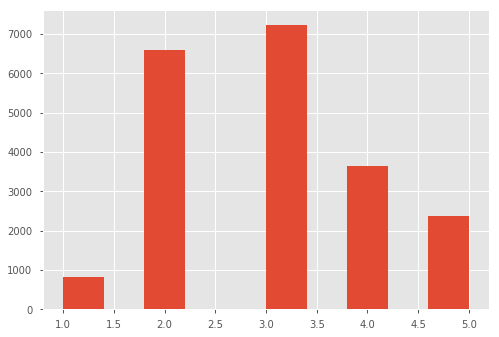

In [70]:
df['income_cat'].hist()

In [43]:
data = train_set.copy()


/home/ssikdar/venvs/env3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


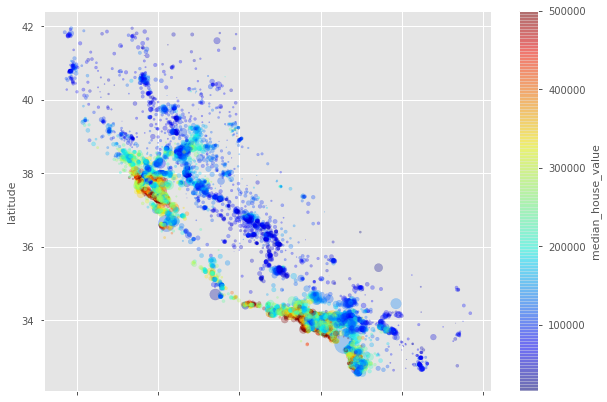

In [71]:
%matplotlib inline
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, 
          s=data['population']/100.0, figsize=(10,7), 
          c="median_house_value", cmap=plt.get_cmap("jet"), 
          colorbar=True)
plt.legend()

In [72]:
corr_matrix = data.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924268,-0.108114,0.042249,0.065072,0.095427,0.052387,-0.014603,-0.047388,-0.009172
latitude,-0.924268,1.000000,0.010158,-0.036198,-0.064435,-0.106523,-0.069957,-0.081976,-0.143763,-0.089121
housing_median_age,-0.108114,0.010158,1.000000,-0.361021,-0.322971,-0.294389,-0.304570,-0.114459,0.104814,-0.143498
total_rooms,0.042249,-0.036198,-0.361021,1.000000,0.931380,0.856996,0.920510,0.203346,0.141382,0.224128
total_bedrooms,0.065072,-0.064435,-0.322971,0.931380,1.000000,0.877178,0.980510,-0.002472,0.054287,0.019724
population,0.095427,-0.106523,-0.294389,0.856996,0.877178,1.000000,0.905825,0.011227,-0.016465,0.031063
households,0.052387,-0.069957,-0.304570,0.920510,0.980510,0.905825,1.000000,0.019041,0.070809,0.043512
median_income,-0.014603,-0.081976,-0.114459,0.203346,-0.002472,0.011227,0.019041,1.000000,0.694791,0.901903
median_house_value,-0.047388,-0.143763,0.104814,0.141382,0.054287,-0.016465,0.070809,0.694791,1.000000,0.649730
income_cat,-0.009172,-0.089121,-0.143498,0.224128,0.019724,0.031063,0.043512,0.901903,0.649730,1.000000


In [73]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.694791
income_cat            0.649730
total_rooms           0.141382
housing_median_age    0.104814
households            0.070809
total_bedrooms        0.054287
population           -0.016465
longitude            -0.047388
latitude             -0.143763
Name: median_house_value, dtype: float64

/home/ssikdar/venvs/env3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


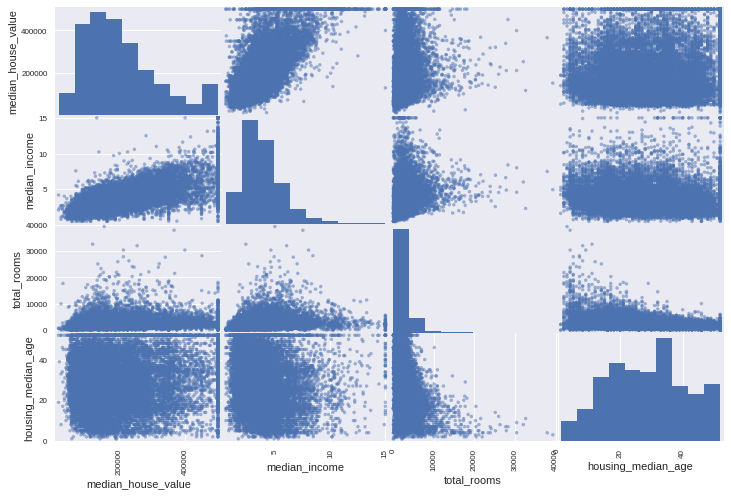

In [83]:
from pandas.tools.plotting import scatter_matrix

plt.style.use('seaborn')

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"];
scatter_matrix(data[attributes], figsize=(12, 8), cmap=plt.get_cmap("jet"));


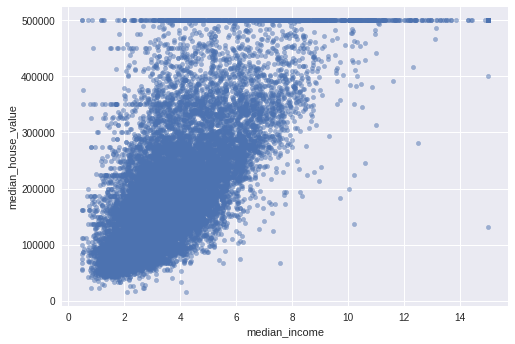

In [81]:
plt.style.use('seaborn')

data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.5)